# Python Homework 3

**Release date:** Saturday, May 9<br>
**Due date:** Friday, May 22, at midnight via <font color="blue">Gradescope</font> 

**Instruction:** Please upload your jupyter notebook on <font color="blue">Gradescope</font> with filename __PythonHW3_YOURPERMNUMBER.ipynb__.


Load some packages:

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import math

## Problem 1 (10 Points)

1. Simulate three different paths (realizations) of a standard Brownian motion on $[0,1]$ and plot your results in one graph.

_Hint:_ Discretize the time interval $[0,1]$ in sufficiently small subintervals of same length with stepsize $1/n$, i.e., choose a sufficiently large number of steps $n$ (e.g., $n=10000$). 


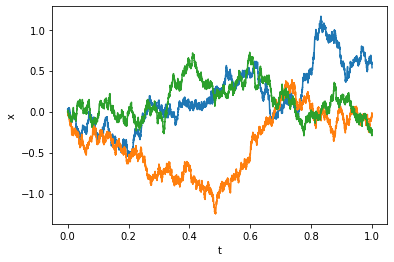

In [77]:
n = 10000
t = 1
for i in range(3):
    bm = np.cumsum(norm.rvs(size = n, loc = 0, scale = math.sqrt(t/n)))
    steps = np.linspace(start = 0, stop = t, num = n)
    plt.plot(steps, bm)
    plt.xlabel('t')
    plt.ylabel('x')
plt.show()

2. A two-dimensional (standard) Brownian motion $(B_t)_{t \geq 0} = ((B^1_t, B^2_t))_{t \geq 0}$ with values in $\mathbb{R}^2$ is given by two one-dimensional $\mathbb{R}$-valued independent (standard) Brownian motions $(B^1_t)_{t \geq 0}$ and $(B^2_t)_{t \geq 0}$. Simulate a realization of a two-dimensional (standard) Brownian motion on the $\mathbb{R}^2$ plane for $t$ running from $0$ to $1$ and plot your result.

<i>Hint:</i> You can use your implementation from 1.

Text(0, 0.5, 'y')

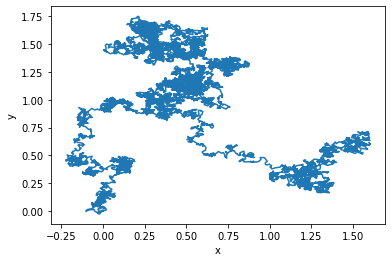

In [90]:
xdis = np.cumsum(norm.rvs(size = n, loc = 0, scale = math.sqrt(t/n)))
ydis = np.cumsum(norm.rvs(size = n, loc = 0, scale = math.sqrt(t/n)))
plt.plot(xdis,ydis)
plt.xlabel('x')
plt.ylabel('y')

## Problem 2 (10 Points)

Let $(B_t)_{t \geq 0}$ be a standard Brownian motion. For $\mu \in \mathbb{R}$ and $\sigma \in \mathbb{R}_+$, the process $(X_t)_{t \geq 0}$ defined by 

$$ X_t = \mu t + \sigma B_t \qquad (t \geq 0)$$

is called __Brownian motion with drift parameter $\mu$ and variance parameter $\sigma^2$__. Moreover, the process $(S_t)_{t \geq 0}$ defined by 

$$ S_t = S_0 \cdot e^{X_t} \qquad (t \geq 0)$$

with starting value $S_0 > 0$ is called __geometric Brownian motion__.



1. Simulate a path of a geometric Brownian motion $(S_t)_{0 \leq t \leq T}$ with parameters $\mu = 0.1, \sigma = 0.176, S_0 = 1125$ on the time interval $[0,5/12]$ (i.e. $T=5/12$). Plot the result.

_Hint:_ Similar to Problem 1 above, discretize the time interval $[0,5/12]$ in sufficiently small subintervals of same length with stepzise $T/n$ (e.g., $n=10000$).  

Text(0, 0.5, 'St')

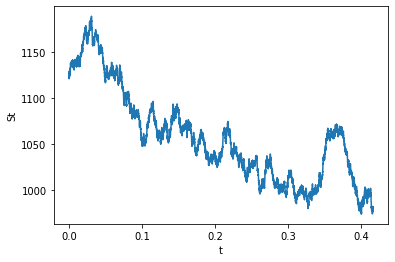

In [111]:
n = 10000
t = 5/12
mu = 0.1
sigma = 0.176
S0 = 1125
steps = np.arange(0, t+t/n, t/n)
gbm = S0 * np.exp(mu*np.array([t*(x/n) for x in range(n+1)]) + sigma*np.cumsum(norm.rvs(size = n+1, loc = 0, scale = math.sqrt(t/n))))
plt.plot(steps, gbm)
plt.xlabel('t')
plt.ylabel('St')

2. In the model introduced by Fisher Black, Myron Scholes, and Robert Merton (1973) for pricing so-called *stock options*, stock price processes are modeled as geometric Brownian motions. A stock option is a contract that gives the buyer of the option the right to receive a certain pre-determined payoff at a future point in time from the option's seller. Typically, the payoff depends on the future evolution of an underlying stock price: For example, a so-called *lookback option* on a stock with maturity $T=5/12$ pays the buyer of the option the payoff $$ S_{5/12} - \min_{t \, \in\, [0,5/12]} S_t$$ at time $T=5/12$, where $(S_t)_{t \geq 0}$ denotes the price process of the underlying stock. Find an approximation of the future expected payoff of this option by running 10000 simulations. Assume that the price follows a geometric Brownian motion with parameters as given in 1.

In [114]:
payoff = np.zeros(n)
for i in range(n):
    gbm = S0 * np.exp(mu*np.array([t*(x/n) for x in range(n+1)]) + sigma*np.cumsum(norm.rvs(size = n+1, loc = 0, scale = math.sqrt(t/n))))
    payoff[i] = gbm[-1] - min(gbm)
np.mean(payoff)

130.48724785967374